In [1]:
import pandas as pd
import scipy.io
import numpy as np
import h5py
import pickle
from sklearn.model_selection import train_test_split

X_test = pd.read_pickle('/Users/prashantronad/Documents/College/6thsem/IDP/Alsnet/X_test.pkl')
y_test = pd.read_pickle('/Users/prashantronad/Documents/College/6thsem/IDP/Alsnet/y_test.pkl')

X_test= np.array(X_test)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [2]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization, Input, Lambda, Activation, Conv2D, MaxPooling2D, Reshape, Bidirectional, TimeDistributed, GRU, GlobalMaxPooling1D
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot


# load model

model= load_model('/Users/prashantronad/Documents/College/6thsem/IDP/Alsnet/ALSNet3.hdf5')

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=1)
#yhat_probs= 1-yhat_probs

# measure best fscore
#y_test=1-y_test
precision, recall, thresholds = precision_recall_curve(y_test, yhat_probs)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
#print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], fscore[ix], precision[ix], recall[ix]))


# predict classes for threshold
yhat_classes = yhat_probs >= 0.5
cm = confusion_matrix(y_test,yhat_classes)
tn, fp, fn, tp = cm.ravel()

model_precision= tp/(tp+fp)
model_recall= tp/(tp+fn)
model_f= 2*model_precision*model_recall/(model_precision+model_recall)
model_accuracy= (tp+tn)/(tp+fp+tn+fn)
model_sensitivity= model_recall
model_specificity= tn/(tn+fp)

# print('Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (0.5, model_f, model_precision, model_recall))
print('Accuracy=%f, Sensitivity=%f, Specificity=%f' % (model_accuracy, model_sensitivity, model_specificity))
print('Confusion matrix : \n',cm)

/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/prashantronad/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 535ms/step
Accuracy=0.977444, Sensitivity=0.967742, Specificity=0.985915
Confusion matrix : 
 [[350   5]
 [ 10 300]]


In [5]:
import scipy.io as sio
# Create a dictionary
adict = {}
adict['precision'] = precision
sio.savemat('./precision.mat', adict)

# Create a dictionary
adict = {}
adict['recall'] = recall
sio.savemat('./recall.mat', adict)

# Create a dictionary
adict = {}
adict['thresholds'] = precision
sio.savemat('./thresholds.mat', adict)

In [6]:
print(tn, fp, fn, tp)
print((y_test).value_counts())

350 5 10 300
0
0    355
1    310
Name: count, dtype: int64


Text(0.5, 0, 'test set samples')

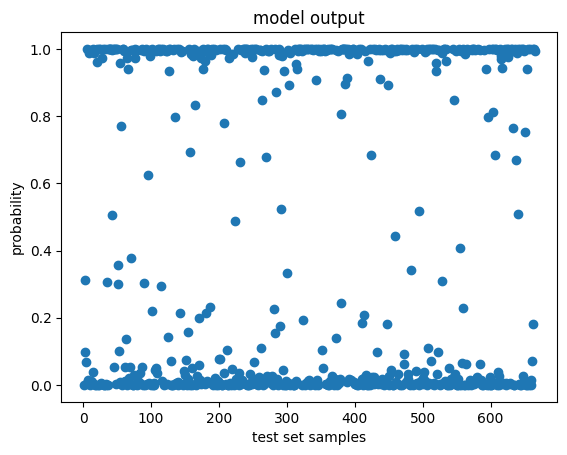

In [7]:
samples= np.arange(1,666,1)
plt.scatter(samples,yhat_probs)
plt.title('model output')
plt.ylabel('probability')
plt.xlabel('test set samples')

In [8]:
import scipy.io as sio
# Create a dictionary
adict = {}
adict['yhat_probs'] = yhat_probs
sio.savemat('./yhat_probs.mat', adict)

# Create a dictionary
y_test= np.array(y_test)
adict = {}
adict['y_test'] = y_test
sio.savemat('./y_test.mat', adict)

NameError: name 'y_test' is not defined

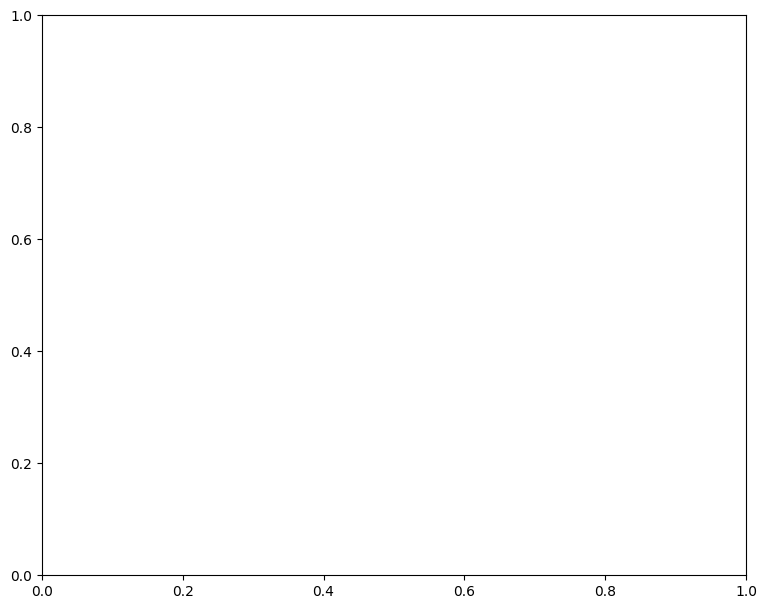

In [1]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a figure with 2x2 subplots
plt.figure(figsize=(20, 16))

# 1. ROC Curve
plt.subplot(2, 2, 1)
fpr, tpr, _ = roc_curve(y_test, yhat_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 2. Precision-Recall Curve
plt.subplot(2, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'F1-Score = {model_f:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

# 3. Confusion Matrix Heatmap
plt.subplot(2, 2, 3)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix\nwith Normalized Colors')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 4. Distribution of Prediction Probabilities
plt.subplot(2, 2, 4)
plt.hist(yhat_probs[y_test == 0], bins=30, alpha=0.5, label='Actual Negative', color='red')
plt.hist(yhat_probs[y_test == 1], bins=30, alpha=0.5, label='Actual Positive', color='green')
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities by Class')
plt.legend()

plt.tight_layout()
plt.show()
